# Input packages and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
data = pd.read_csv('busiest_airport_airline_delays.csv')

# Preprocessing

In [3]:
data.nunique()

DAY_OF_WEEK                        7
DEP_DEL15                          2
DISTANCE_GROUP                    11
DEP_BLOCK                          6
SEGMENT_NUMBER                    11
CONCURRENT_FLIGHTS               206
NUMBER_OF_SEATS                   70
CARRIER_NAME                      16
AIRPORT_FLIGHTS_MONTH              5
AIRLINE_FLIGHTS_MONTH             16
AIRLINE_AIRPORT_FLIGHTS_MONTH     63
AVG_MONTHLY_PASS_AIRPORT           5
AVG_MONTHLY_PASS_AIRLINE          16
FLT_ATTENDANTS_PER_PASS           13
GROUND_SERV_PER_PASS              16
PLANE_AGE                         32
DEPARTING_AIRPORT                  5
LATITUDE                           5
LONGITUDE                          5
PREVIOUS_AIRPORT                 285
PRCP                              35
SNOW                               8
SNWD                               3
TMAX                              43
AWND                              56
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120894 entries, 0 to 120893
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DAY_OF_WEEK                    120894 non-null  int64  
 1   DEP_DEL15                      120894 non-null  int64  
 2   DISTANCE_GROUP                 120894 non-null  int64  
 3   DEP_BLOCK                      120894 non-null  object 
 4   SEGMENT_NUMBER                 120894 non-null  int64  
 5   CONCURRENT_FLIGHTS             120894 non-null  int64  
 6   NUMBER_OF_SEATS                120894 non-null  int64  
 7   CARRIER_NAME                   120894 non-null  object 
 8   AIRPORT_FLIGHTS_MONTH          120894 non-null  int64  
 9   AIRLINE_FLIGHTS_MONTH          120894 non-null  int64  
 10  AIRLINE_AIRPORT_FLIGHTS_MONTH  120894 non-null  int64  
 11  AVG_MONTHLY_PASS_AIRPORT       120894 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRLINE      

In [5]:
data.describe()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,...,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000,120894.000000
mean,3.942677,0.149710,3.353525,3.211152,177.968783,127.222674,24984.998114,58978.630974,7537.814565,593673.915852,...,0.000612,0.000723,11.730557,36.489558,-90.471664,0.126495,0.042920,0.144341,51.493838,8.819766
std,1.910102,0.356788,1.855241,1.718627,52.524855,50.946997,4667.824038,27722.923436,6050.361247,142124.197550,...,0.000532,0.000263,7.522912,3.600088,8.318211,0.307733,0.262952,0.486133,11.645643,3.449294
min,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,19902.000000,7688.000000,1.000000,413854.000000,...,0.000000,0.000033,0.000000,32.894000,-104.880000,0.000000,0.000000,0.000000,19.000000,2.680000
25%,2.000000,0.000000,2.000000,2.000000,156.000000,76.000000,20193.000000,25366.000000,3787.000000,516205.000000,...,0.000170,0.000492,4.000000,33.641000,-97.030000,0.000000,0.000000,0.000000,42.000000,6.040000
50%,4.000000,0.000000,3.000000,3.000000,182.000000,142.000000,23873.000000,69699.000000,5347.000000,541843.000000,...,0.000504,0.000792,13.000000,35.219000,-87.906000,0.000000,0.000000,0.000000,53.000000,8.050000
75%,5.000000,0.000000,4.000000,4.000000,213.000000,172.000000,32102.000000,80026.000000,11786.000000,816174.000000,...,0.000768,0.000911,18.000000,39.774000,-84.427000,0.020000,0.000000,0.000000,60.000000,11.180000
max,7.000000,1.000000,11.000000,11.000000,286.000000,337.000000,32102.000000,107849.000000,19461.000000,816174.000000,...,0.001759,0.001265,32.000000,41.978000,-80.936000,1.910000,3.100000,2.000000,79.000000,25.050000


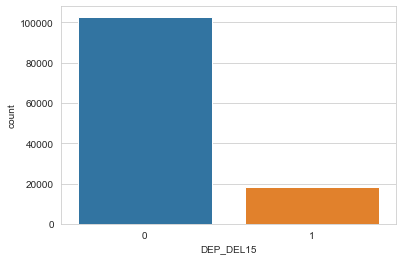

In [6]:
sns.set_style('whitegrid')
sns.countplot(x=data['DEP_DEL15'],data=data)
plt.show()

## Data Cleaning

In [7]:
data = data.drop_duplicates()
data = data.drop(columns=['LATITUDE','LONGITUDE'])
data.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,0,5,MORNING,1,229,142,United Air Lines Inc.,32102,48104,...,0.001402,0.001265,19,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47
1,3,0,3,MORNING,1,229,120,United Air Lines Inc.,32102,48104,...,0.001402,0.001265,22,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47
2,3,0,9,MORNING,1,229,142,United Air Lines Inc.,32102,48104,...,0.001402,0.001265,24,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47
3,3,0,1,EARLY_MORNING,1,4,128,American Airlines Inc.,32102,75591,...,0.000504,0.000911,20,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47
4,3,0,2,MORNING,1,229,50,SkyWest Airlines Inc.,32102,69699,...,0.000170,0.000492,21,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47


In [8]:
data['DEPARTING_AIRPORT'].value_counts()

Atlanta Municipal               31793
Chicago O'Hare International    24601
Dallas Fort Worth Regional      23561
Stapleton International         19997
Douglas Municipal               19779
Name: DEPARTING_AIRPORT, dtype: int64

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['DEP_BLOCK']= label_encoder.fit_transform(data['DEP_BLOCK'])
data['CARRIER_NAME']= label_encoder.fit_transform(data['CARRIER_NAME'])
data['DEPARTING_AIRPORT']= label_encoder.fit_transform(data['DEPARTING_AIRPORT'])
data['PREVIOUS_AIRPORT']= label_encoder.fit_transform(data['PREVIOUS_AIRPORT'])

In [10]:
data['DEPARTING_AIRPORT'].value_counts()

0    31793
1    24601
2    23561
4    19997
3    19779
Name: DEPARTING_AIRPORT, dtype: int64

# Graph

## DAY_OF_WEEK

<AxesSubplot:xlabel='DEP_DEL15', ylabel='DAY_OF_WEEK'>

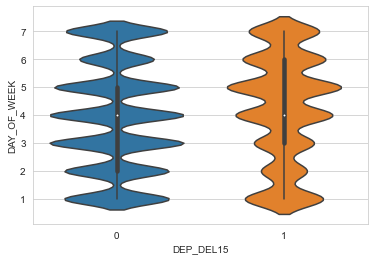

In [11]:
sns.violinplot(x=data.DEP_DEL15 , y=data.DAY_OF_WEEK)

## DISTANCE_GROUP

<AxesSubplot:xlabel='DEP_DEL15', ylabel='DISTANCE_GROUP'>

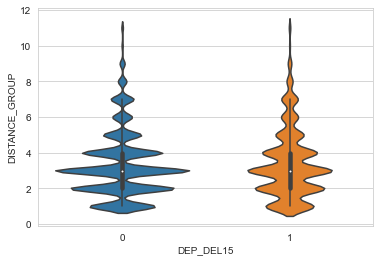

In [12]:
sns.violinplot(x=data.DEP_DEL15 , y=data.DISTANCE_GROUP, split=True)

In [13]:
data["DISTANCE_GROUP"].value_counts()

3     32847
2     25883
4     19861
1     16585
5      9621
7      5746
6      5115
8      2143
9      1259
11      400
10      271
Name: DISTANCE_GROUP, dtype: int64

In [14]:
DISTANCE_GROUP = pd.crosstab(index=data["DISTANCE_GROUP"], 
                           columns=data["DEP_DEL15"])
DISTANCE_GROUP

DEP_DEL15,0,1
DISTANCE_GROUP,,
1,13966,2619
2,22088,3795
3,28229,4618
4,16860,3001
5,8077,1544
6,4182,933
7,4842,904
8,1813,330
9,1063,196


## DEP_BLOCK

<AxesSubplot:xlabel='DEP_DEL15', ylabel='DEP_BLOCK'>

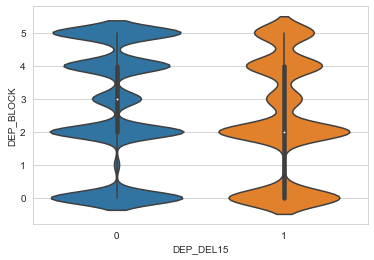

In [15]:
sns.violinplot(x=data.DEP_DEL15 , y=data.DEP_BLOCK)

## SEGMENT_NUMBER

<AxesSubplot:xlabel='DEP_DEL15', ylabel='SEGMENT_NUMBER'>

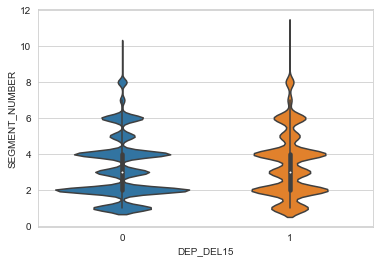

In [16]:
sns.violinplot(x=data.DEP_DEL15 , y=data.SEGMENT_NUMBER)

## CONCURRENT_FLIGHTS

<AxesSubplot:xlabel='DEP_DEL15', ylabel='CONCURRENT_FLIGHTS'>

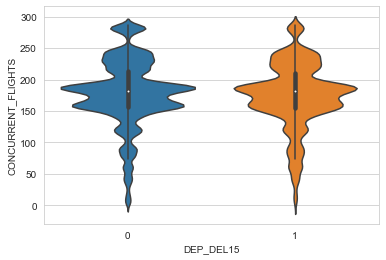

In [17]:
sns.violinplot(x=data.DEP_DEL15 , y=data.CONCURRENT_FLIGHTS)

In [18]:
CF = pd.crosstab(index=data["CONCURRENT_FLIGHTS"], columns=data["DEP_DEL15"])
CFmin = CF[CF[1]/(CF[1]+CF[0])>0.2]
CFmin

DEP_DEL15,0,1
CONCURRENT_FLIGHTS,,
1,3,2
13,40,11
14,39,16
33,50,16
37,25,12
42,126,42
47,67,27
49,39,10
53,29,24


In [19]:
CFmin.describe()

DEP_DEL15,0,1
count,48.000000,48.000000
mean,284.145833,93.750000
std,288.095654,84.839147
min,3.000000,2.000000
25%,56.500000,26.500000
50%,159.000000,65.000000
75%,504.250000,158.000000
max,1072.000000,367.000000


## NUMBER_OF_SEATS

<AxesSubplot:xlabel='DEP_DEL15', ylabel='NUMBER_OF_SEATS'>

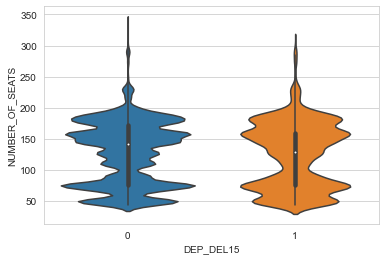

In [20]:
sns.violinplot(x=data.DEP_DEL15 , y=data.NUMBER_OF_SEATS)

In [21]:
NOS = pd.crosstab(index=data["NUMBER_OF_SEATS"], columns=data["DEP_DEL15"])
NOSmin = NOS[NOS[1]/(NOS[1]+NOS[0])>0.2]
NOSmin

DEP_DEL15,0,1
NUMBER_OF_SEATS,,
65,23,7
66,2602,731
79,1239,338
146,28,11
170,1,1
176,369,131
181,2369,598
188,61,31
198,28,8


In [22]:
NOSmin.describe()

DEP_DEL15,0,1
count,19.000000,19.000000
mean,402.368421,112.736842
std,794.835707,212.507736
min,0.000000,1.000000
25%,14.500000,7.000000
50%,28.000000,11.000000
75%,248.000000,91.000000
max,2602.000000,731.000000


## CARRIER_NAME

<AxesSubplot:xlabel='DEP_DEL15', ylabel='CARRIER_NAME'>

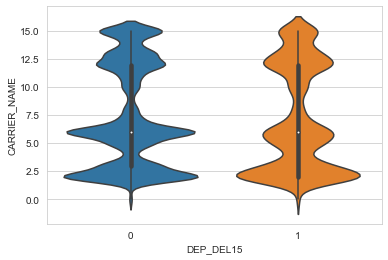

In [23]:
sns.violinplot(x=data.DEP_DEL15 , y=data.CARRIER_NAME)

## AIRPORT_FLIGHTS_MONTH

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AIRPORT_FLIGHTS_MONTH'>

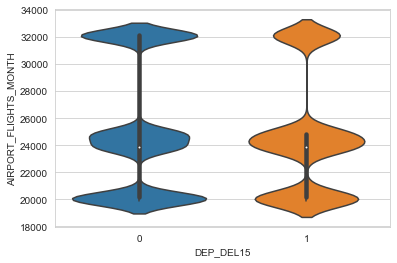

In [24]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AIRPORT_FLIGHTS_MONTH)

## AIRLINE_FLIGHTS_MONTH

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AIRLINE_FLIGHTS_MONTH'>

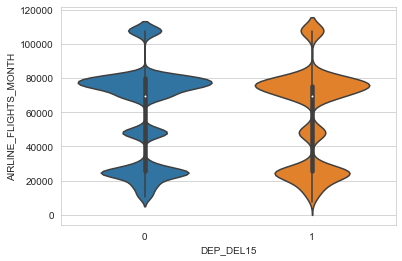

In [25]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AIRLINE_FLIGHTS_MONTH)

## AIRLINE_AIRPORT_FLIGHTS_MONTH

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AIRLINE_AIRPORT_FLIGHTS_MONTH'>

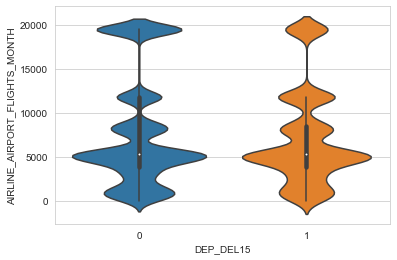

In [26]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AIRLINE_AIRPORT_FLIGHTS_MONTH)

In [27]:
AAFM = pd.crosstab(index=data["AIRLINE_AIRPORT_FLIGHTS_MONTH"], columns=data["DEP_DEL15"])
AAFMmin = AAFM[(AAFM[1]+AAFM[0])<100]
AAFMmin

DEP_DEL15,0,1
AIRLINE_AIRPORT_FLIGHTS_MONTH,,
1,0,1
10,9,1
36,28,8
74,58,15
85,70,15
86,62,24
91,81,10
93,69,24
96,78,18


In [28]:
AAFM.describe()

DEP_DEL15,0,1
count,63.000000,63.000000
mean,1613.841270,286.650794
std,2827.146397,485.010913
min,0.000000,1.000000
25%,140.500000,25.000000
50%,485.000000,60.000000
75%,1530.500000,310.000000
max,17351.000000,2505.000000


## AVG_MONTHLY_PASS_AIRPORT

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AVG_MONTHLY_PASS_AIRPORT'>

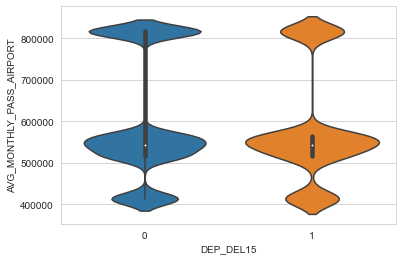

In [29]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AVG_MONTHLY_PASS_AIRPORT)

## AVG_MONTHLY_PASS_AIRLINE

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AVG_MONTHLY_PASS_AIRLINE'>

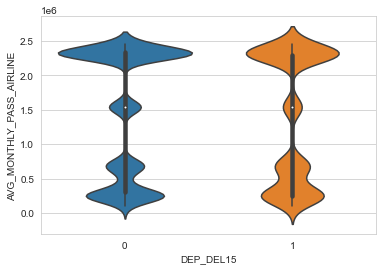

In [30]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AVG_MONTHLY_PASS_AIRLINE)

## FLT_ATTENDANTS_PER_PASS

<AxesSubplot:xlabel='DEP_DEL15', ylabel='FLT_ATTENDANTS_PER_PASS'>

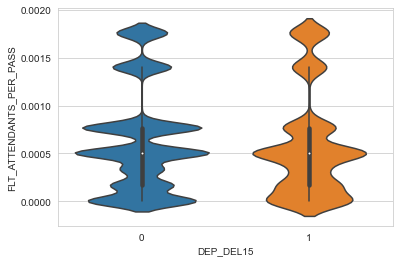

In [31]:
sns.violinplot(x=data.DEP_DEL15 , y=data.FLT_ATTENDANTS_PER_PASS)

## GROUND_SERV_PER_PASS

<AxesSubplot:xlabel='DEP_DEL15', ylabel='GROUND_SERV_PER_PASS'>

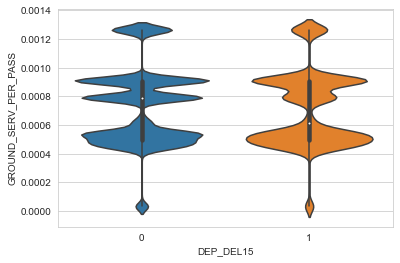

In [32]:
sns.violinplot(x=data.DEP_DEL15 , y=data.GROUND_SERV_PER_PASS)

## PLANE_AGE

<AxesSubplot:xlabel='DEP_DEL15', ylabel='PLANE_AGE'>

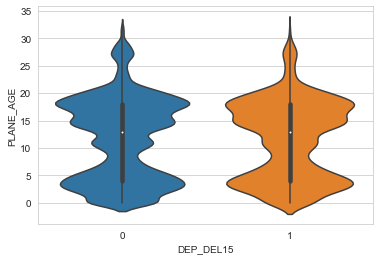

In [33]:
sns.violinplot(x=data.DEP_DEL15 , y=data.PLANE_AGE)

## DEPARTING_AIRPORT

<AxesSubplot:xlabel='DEP_DEL15', ylabel='DEPARTING_AIRPORT'>

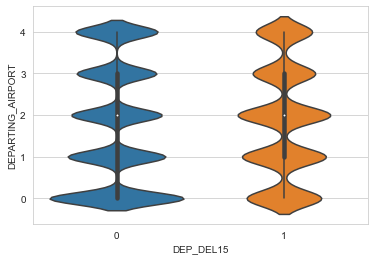

In [34]:
sns.violinplot(x=data.DEP_DEL15 , y=data.DEPARTING_AIRPORT)

## PREVIOUS_AIRPORT

<AxesSubplot:xlabel='DEP_DEL15', ylabel='PREVIOUS_AIRPORT'>

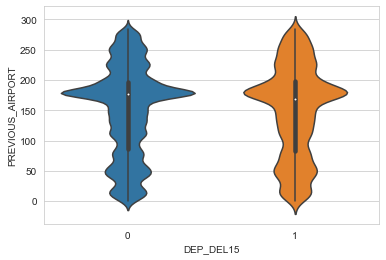

In [35]:
sns.violinplot(x=data.DEP_DEL15 , y=data.PREVIOUS_AIRPORT)

## PRCP

<AxesSubplot:xlabel='DEP_DEL15', ylabel='PRCP'>

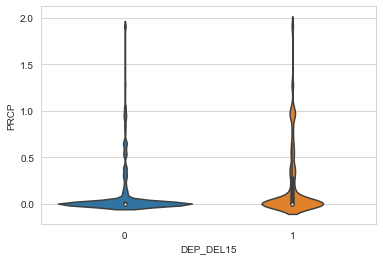

In [36]:
sns.violinplot(x=data.DEP_DEL15 , y=data.PRCP)

## SNOW

<AxesSubplot:xlabel='DEP_DEL15', ylabel='SNOW'>

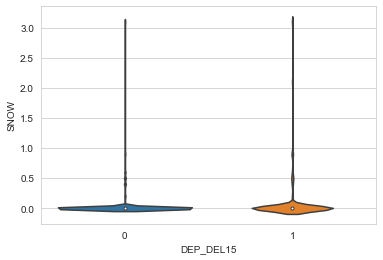

In [37]:
sns.violinplot(x=data.DEP_DEL15 , y=data.SNOW)

## SNWD

<AxesSubplot:xlabel='DEP_DEL15', ylabel='SNWD'>

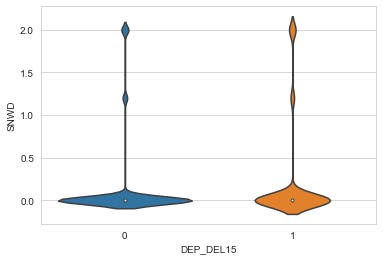

In [38]:
sns.violinplot(x=data.DEP_DEL15 , y=data.SNWD)

## TMAX

<AxesSubplot:xlabel='DEP_DEL15', ylabel='TMAX'>

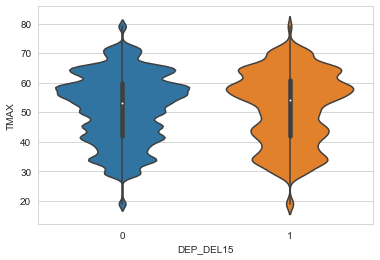

In [39]:
sns.violinplot(x=data.DEP_DEL15 , y=data.TMAX)

## AWND

<AxesSubplot:xlabel='DEP_DEL15', ylabel='AWND'>

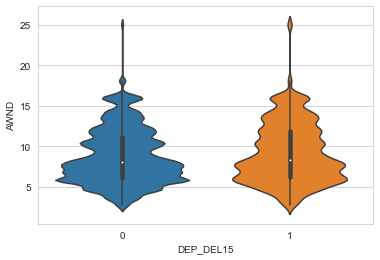

In [40]:
sns.violinplot(x=data.DEP_DEL15 , y=data.AWND)